In [133]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# mv '/content/drive/MyDrive/Alzheimer_s_Dataset' '/content/'

In [134]:
!pip install tensorflow -q


In [135]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
import Alzheimer_s_Dataset
import matplotlib.pyplot as plt
import PIL
import torchvision

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Device:', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print('Number of replicas:', strategy.num_replicas_in_sync)
    
print(tf.__version__)

Number of replicas: 1
2.8.2


In [136]:
# model = tf.keras.Model.create_model()
model = keras.models.load_model('/content/alzheimer_model.h5')

In [138]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 16 * strategy.num_replicas_in_sync
IMAGE_SIZE = [176, 208]


Found 16 images belonging to 4 classes.
94.59 % chances are there that the image is NonDemented


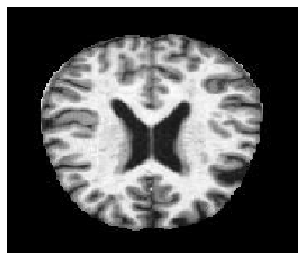

In [140]:
# Test for NonDemented
from skimage.io import imread, imshow
test_datagen  = ImageDataGenerator(rescale = 1./255)
from tensorflow.keras.models import Sequential
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

test_dataset  = test_datagen.flow_from_directory(directory = '/content/drive/MyDrive/testimg',
                                                 target_size = (224,224), class_mode = 'categorical',
                                                                  batch_size = 128)
dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}


img = load_img('/content/drive/MyDrive/testimg/NonDemented/nondem2.jpg', target_size = (176,208,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
answer = model.predict(img)
probability = round(np.max(model.predict(img)*100),2)

print(probability, '% chances are there that the image is NonDemented')

Found 16 images belonging to 4 classes.
94.14 % chances are there that the image is MildDemented


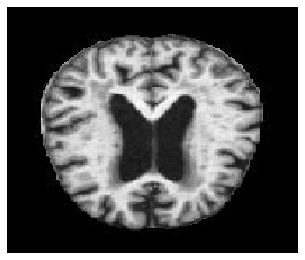

In [141]:
# Test for MildDemented
from skimage.io import imread, imshow
test_datagen  = ImageDataGenerator(rescale = 1./255)
from tensorflow.keras.models import Sequential
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

test_dataset  = test_datagen.flow_from_directory(directory = '/content/drive/MyDrive/testimg',
                                                 target_size = (224,224), class_mode = 'categorical',
                                                                  batch_size = 128)
dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}


img = load_img('/content/drive/MyDrive/testimg/MildDemented/milddem2.jpg', target_size = (176,208,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
answer = model.predict(img)
probability = round(np.max(model.predict(img)*100),2)

print(probability, '% chances are there that the image is MildDemented')

Found 16 images belonging to 4 classes.
86.22 % chances are there that the image is VeryMildDemented


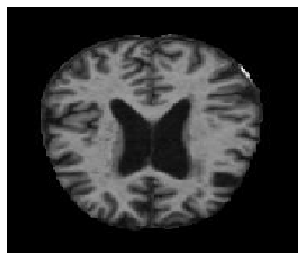

In [142]:
# Test for VeryMildDemented
from skimage.io import imread, imshow
test_datagen  = ImageDataGenerator(rescale = 1./255)
from tensorflow.keras.models import Sequential
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

test_dataset  = test_datagen.flow_from_directory(directory = '/content/drive/MyDrive/testimg',
                                                 target_size = (224,224), class_mode = 'categorical',
                                                                  batch_size = 128)
dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}


img = load_img('/content/drive/MyDrive/testimg/VeryMildDemented/verymilddem3.jpg', target_size = (176,208,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
answer = model.predict(img)
probability = round(np.max(model.predict(img)*100),2)

print(probability, '% chances are there that the image is VeryMildDemented')

Found 16 images belonging to 4 classes.
86.26 % chances are there that the image is ModerateDemented


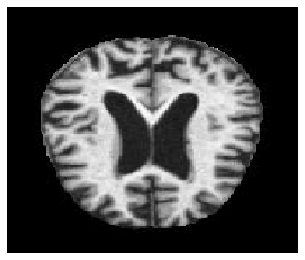

In [143]:
# Test for ModerateDemented
from skimage.io import imread, imshow
test_datagen  = ImageDataGenerator(rescale = 1./255)
from tensorflow.keras.models import Sequential
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

test_dataset  = test_datagen.flow_from_directory(directory = '/content/drive/MyDrive/testimg',
                                                 target_size = (224,224), class_mode = 'categorical',
                                                                  batch_size = 128)
dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}


img = load_img('/content/drive/MyDrive/testimg/ModerateDemented/moderatedim4.jpg', target_size = (176,208,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
answer = model.predict(img)
probability = round(np.max(model.predict(img)*100),2)

print(probability, '% chances are there that the image is ModerateDemented')